In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
data = np.array(pd.read_csv('train.csv'))
m, n = data.shape
np.random.shuffle(data)

data_cv = data[0:1000].T
Y_cv = data_cv[0]
X_cv = data_cv[1:n]
X_cv = X_cv/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape


In [119]:
X_train.T[0].shape

(784,)

In [120]:
def init_params():
    W1 = np.random.randn(10,784) *0.01
    b1 = np.random.randn(10,1) *0.01
    W2 = np.random.randn(10,10) *0.01
    b2 = np.random.randn(10,1) *0.01

    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(0,Z)

def softmax(z):
    e_z = np.exp(z-np.max(z))
    a = e_z/np.sum(e_z, axis=0)

    return a

def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, y):
    # print(one_hot_Y)
    dZ2 = A2 - y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1)

    dZ1 = np.dot(W2.T, dZ2)*ReLU_deriv(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # print(db2.shape, b2.shape, db1.shape, b1.shape)
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*np.reshape(db1,(10,1))
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*np.reshape(db2,(10,1))

    return W1, b1, W2, b2

In [121]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

costs = []

def gradient_descent(X, Y, alpha, epochs):
    W1, b1, W2, b2 = init_params()
    one_hot_Y = one_hot(Y)
    m = Y.shape[0]
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        costs.append((-1/m)*np.sum(one_hot_Y*np.log(A2)))
        
        if i%100 == 0 or i == epochs-1:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [122]:
learning_rate = 0.1
epochs = 10000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, learning_rate, epochs)

Iteration:  0
[3 3 3 ... 3 3 0] [2 8 8 ... 4 8 8]
0.1054390243902439
Iteration:  100
[9 0 8 ... 9 9 8] [2 8 8 ... 4 8 8]
0.5467560975609757
Iteration:  200
[8 5 8 ... 4 8 8] [2 8 8 ... 4 8 8]
0.7844634146341464
Iteration:  300
[8 0 8 ... 4 8 8] [2 8 8 ... 4 8 8]
0.8625365853658536
Iteration:  400
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.8836585365853659
Iteration:  500
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.8947317073170732
Iteration:  600
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9018780487804878
Iteration:  700
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9059756097560976
Iteration:  800
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9092439024390244
Iteration:  900
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9124146341463415
Iteration:  1000
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9148536585365854
Iteration:  1100
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9172682926829269
Iteration:  1200
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9190731707317074
Iteration:  1300
[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
0.9206341463414635
Iter

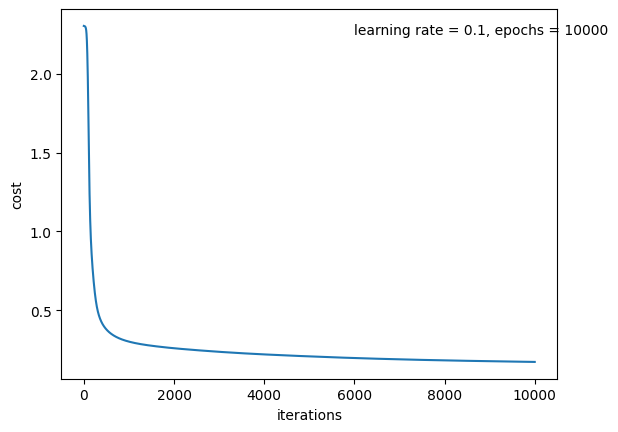

In [123]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.text(6000,2.25, f'learning rate = {learning_rate}, epochs = {epochs}')
plt.show()

In [124]:
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_cv)
predictions = get_predictions(A2)
print(get_accuracy(predictions, Y_cv))

[6 8 0 3 7 7 8 0 7 5 0 7 1 0 7 6 3 1 1 4 8 5 5 1 7 5 2 3 7 7 3 8 4 7 0 6 7
 8 2 3 0 7 3 8 0 0 5 5 0 4 1 4 0 1 5 1 2 4 0 9 6 4 0 4 2 6 1 2 2 9 6 7 9 5
 9 3 1 3 3 8 0 7 8 2 2 6 5 3 7 1 7 4 6 6 5 8 3 2 3 4 7 2 0 2 5 3 4 6 1 0 3
 3 5 1 0 5 5 2 0 6 5 8 1 3 0 9 2 4 8 7 6 6 4 6 9 6 1 7 6 6 2 0 4 9 9 7 8 5
 1 5 1 5 2 2 5 4 3 6 2 0 9 4 0 4 1 5 4 8 8 4 6 9 4 3 5 4 0 1 5 2 2 6 6 2 1
 9 6 9 1 9 0 7 1 1 5 1 2 1 9 4 8 8 9 6 7 9 9 2 8 9 5 1 8 0 5 5 3 2 5 2 0 8
 7 4 6 7 0 6 5 7 4 2 9 4 1 2 3 9 3 6 0 2 3 2 9 1 6 2 5 9 7 1 4 0 6 7 6 3 5
 9 8 2 9 9 4 8 7 0 3 1 3 3 1 1 0 4 7 6 7 9 1 0 7 7 7 8 9 9 1 0 6 9 5 3 1 3
 7 5 7 7 9 1 8 3 5 6 9 7 1 8 1 2 1 3 9 2 0 1 1 1 6 6 8 0 1 9 2 6 2 7 9 7 6
 7 2 9 8 8 9 4 7 6 3 9 6 4 2 6 3 5 4 5 5 5 8 6 1 8 2 7 8 4 1 2 7 4 6 2 6 3
 0 1 1 6 7 1 8 3 9 9 1 2 6 8 5 6 7 2 4 6 8 8 4 2 2 3 6 8 2 2 3 1 1 5 6 2 1
 1 1 0 1 6 3 0 6 7 6 9 6 1 6 5 0 9 8 9 2 9 3 7 9 0 6 9 7 2 9 8 0 9 3 2 6 5
 8 3 1 2 3 9 1 5 0 3 9 1 7 1 3 4 3 9 8 6 9 6 1 1 6 2 2 6 6 2 7 1 2 4 6 4 8
 7 5 9 9 3 4 0 8 2 7 9 2 

In [125]:
data_test = np.array(pd.read_csv('test.csv'))
data_test = data_test.T
X_test = data_test/255
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)
print(predictions)

[2 0 9 ... 3 9 2]


In [126]:
print(X_test.T[1].shape)

(784,)


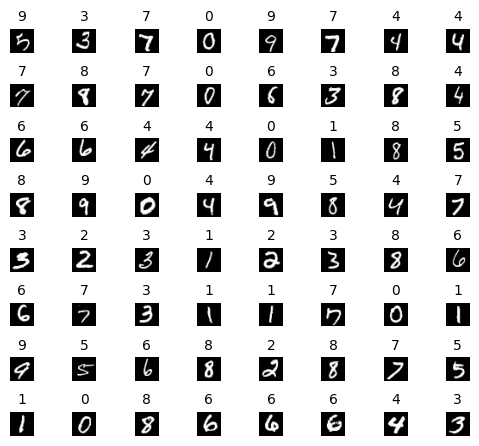

In [127]:
m_test, n_test = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
     # Select random indices
    random_index = np.random.randint(m_test)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test.T[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f"{predictions[random_index]}",fontsize=10)
    ax.set_axis_off()

plt.show()


In [128]:
df = pd.DataFrame(predictions)

df.rename(columns={0: 'Label'}, inplace=True)
# df.rename_axis('ImageId', inplace=True)

In [129]:
df['ImageId'] = df.index + 1
col = df.pop('ImageId')
df.insert(0, col.name, col)
df.to_csv('submission.csv', index=False)

In [131]:
print(f'Train Accuracy: {get_accuracy(get_predictions(forward_prop(W1, b1, W2, b2, X_train)[3]), Y_train)*100:.2f}%')
print(f'CV Accuracy: {get_accuracy(get_predictions(forward_prop(W1, b1, W2, b2, X_cv)[3]), Y_cv)*100:.2f}%')

[2 0 8 ... 4 4 8] [2 8 8 ... 4 8 8]
Train Accuracy: 94.97%
[6 8 0 3 7 7 8 0 7 5 0 7 1 0 7 6 3 1 1 4 8 5 5 1 7 5 2 3 7 7 3 8 4 7 0 6 7
 8 2 3 0 7 3 8 0 0 5 5 0 4 1 4 0 1 5 1 2 4 0 9 6 4 0 4 2 6 1 2 2 9 6 7 9 5
 9 3 1 3 3 8 0 7 8 2 2 6 5 3 7 1 7 4 6 6 5 8 3 2 3 4 7 2 0 2 5 3 4 6 1 0 3
 3 5 1 0 5 5 2 0 6 5 8 1 3 0 9 2 4 8 7 6 6 4 6 9 6 1 7 6 6 2 0 4 9 9 7 8 5
 1 5 1 5 2 2 5 4 3 6 2 0 9 4 0 4 1 5 4 8 8 4 6 9 4 3 5 4 0 1 5 2 2 6 6 2 1
 9 6 9 1 9 0 7 1 1 5 1 2 1 9 4 8 8 9 6 7 9 9 2 8 9 5 1 8 0 5 5 3 2 5 2 0 8
 7 4 6 7 0 6 5 7 4 2 9 4 1 2 3 9 3 6 0 2 3 2 9 1 6 2 5 9 7 1 4 0 6 7 6 3 5
 9 8 2 9 9 4 8 7 0 3 1 3 3 1 1 0 4 7 6 7 9 1 0 7 7 7 8 9 9 1 0 6 9 5 3 1 3
 7 5 7 7 9 1 8 3 5 6 9 7 1 8 1 2 1 3 9 2 0 1 1 1 6 6 8 0 1 9 2 6 2 7 9 7 6
 7 2 9 8 8 9 4 7 6 3 9 6 4 2 6 3 5 4 5 5 5 8 6 1 8 2 7 8 4 1 2 7 4 6 2 6 3
 0 1 1 6 7 1 8 3 9 9 1 2 6 8 5 6 7 2 4 6 8 8 4 2 2 3 6 8 2 2 3 1 1 5 6 2 1
 1 1 0 1 6 3 0 6 7 6 9 6 1 6 5 0 9 8 9 2 9 3 7 9 0 6 9 7 2 9 8 0 9 3 2 6 5
 8 3 1 2 3 9 1 5 0 3 9 1 7 1 3 4 3 9 8 6 